## Kütüphaneler

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid") # grafik kareli olsun
import seaborn as sns

from collections import Counter

# uyarıları kapatalım
import warnings
warnings.filterwarnings("ignore")

/var/folders/x8/nnk_zbps5d547d0lzb19x0s80000gn/T/ipykernel_3008/629031644.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid") # grafik kareli olsun


## Veri Seti

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
test_PassengerId = test_df["PassengerId"]

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* PassengerId: her yolcuya özel kimlik numarası
* Survived: yolcu hayatta kaldı ise 1, öldü ise 0
* Pclass: yolcu sınıfı
* Name: isim
* Sex: yolcunun cinsiyeti
* Age: yolcunun yaşı
* SibSp: kardeş/eş sayısı
* Parch: ebeveyn/çocuk sayısı
* Ticket: bilet numarası
* Fare: bilete harcanan para miktarı
* Cabin: kabin kategorisi
* Embarked: yolcunun bindiği liman (C = Cherbourg, Q = Queenstown, S = Southampton)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Kategorik Değişkenler
Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, SibSp and Parch

In [8]:
# Kategorik değişkenleri görselleştirelim

In [9]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
train_df["Survived"].value_counts().index

Int64Index([0, 1], dtype='int64')

In [11]:
train_df["Survived"].value_counts().index.values

array([0, 1])

In [12]:
# input: değişken
# output: değişkenin sınıflarının frekansı
def bar_plot(variable):
    var = train_df[variable] # değişken
    varValue = var.value_counts() # değişkenin sınıflarının frekansı
    
    # görselleştirme
    plt.figure(figsize = (9,3))
    # x ekseninde kategoriler
    # y ekseninde her kategorileriden ne kadar var?
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable, varValue))

* Survived: hayatta kalanlar(1) ve hayatta kalmayanlar(0)
    * 0: 549
    * 1: 342
    * yarı yarıya değil dolayısıyla dengeli bir veri seti değildir.
* cinsiyet dengesizdir.

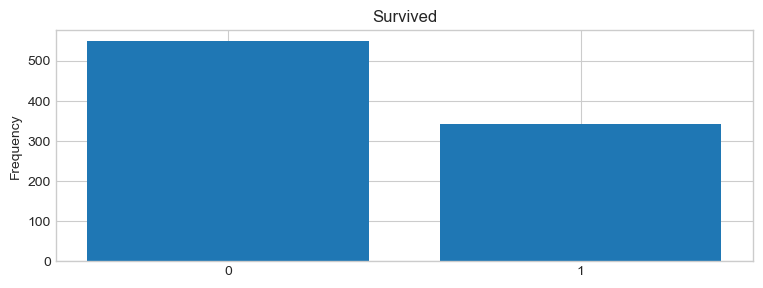

Survived:
0    549
1    342
Name: Survived, dtype: int64


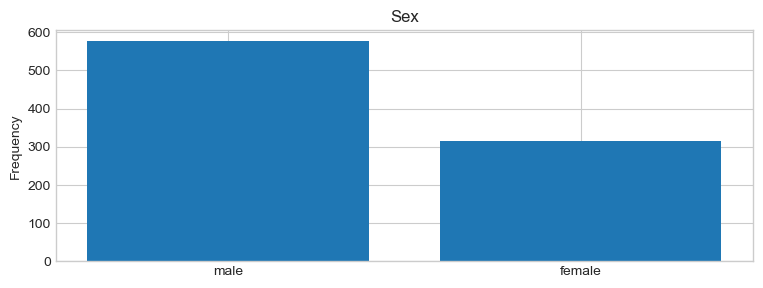

Sex:
male      577
female    314
Name: Sex, dtype: int64


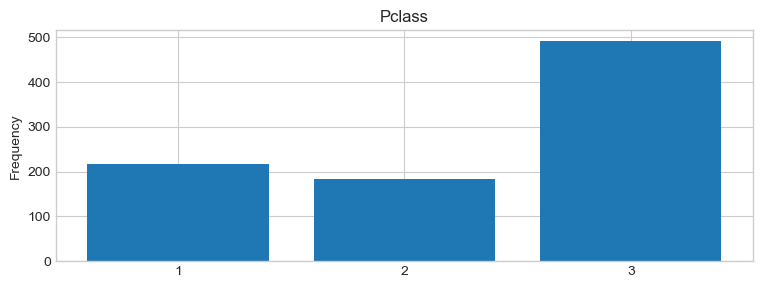

Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64


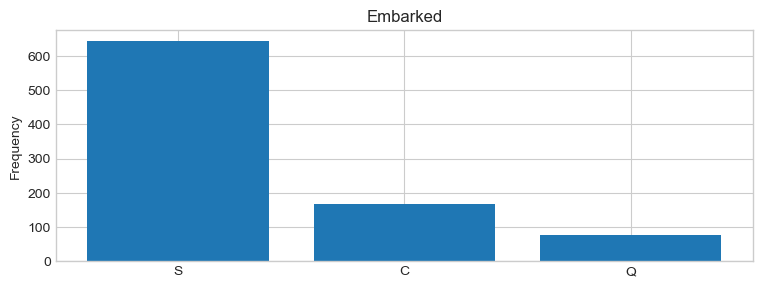

Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


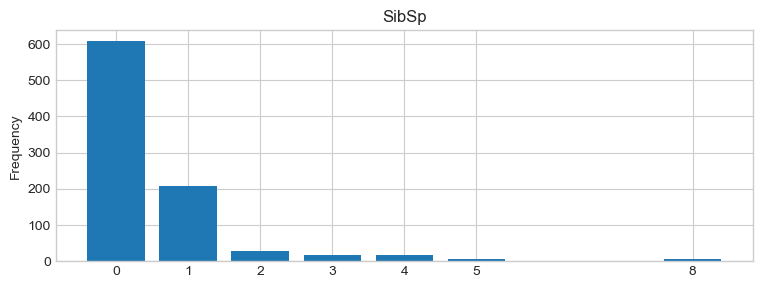

SibSp:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


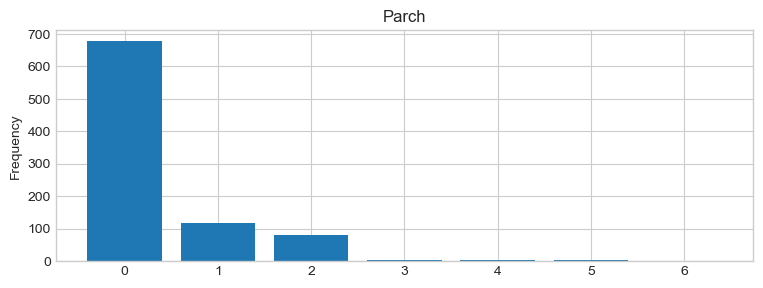

Parch:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [13]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for c in category1:
    bar_plot(c)

In [14]:
# diğer kategorik değişkenler

In [15]:
print("{}\n".format(train_df["Cabin"].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64



In [16]:
print("{}\n".format(train_df["Ticket"].value_counts()))

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64



## Sayısal Değişkenler
Fare, age and passengerId

In [17]:
# histogram ile değişkenlerin dağılımını görselleştirelim

In [18]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

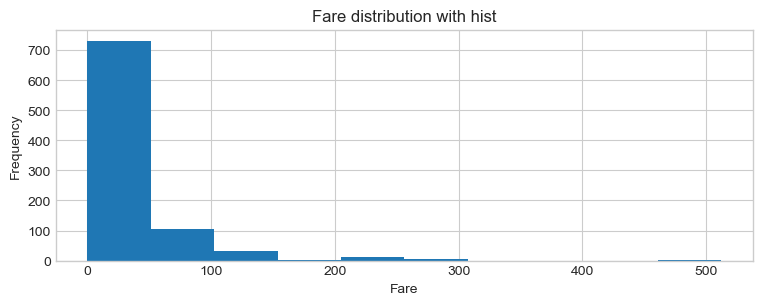

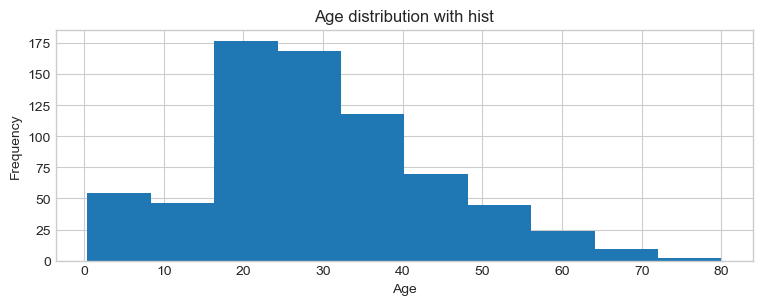

In [19]:
numericVar = ["Fare","Age"]
for n in numericVar:
    plot_hist(n)

## Temel Veri Analizi

In [20]:
# bazı özelliklerin birbirleriyle olan ilişkilerini öğreneceğiz
# Pclass - Survived: yolcuların sınıflarının hayatta kalma ile bir ilişkisi var mı?
# Cinsiyet(sex) - Survived
# SibSp - Survived
# Parch - Survived

In [21]:
# Pclass - Survived: yolcuların sınıflarının hayatta kalma ile bir ilişkisi var mı?
# sadece Pclass ve Survived değişkenlerini al ve Pclass'a göre grupla
# as_index=False: Pclass'ı index olarak kullanma
# ve her bir grubun ortalamasını al
# azalan olarak sırala
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


1. sınıf yolcuların hayatta kalma oranının diğerlerine göre daha yüksek olduğu görülür.

In [22]:
train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


bir kişinin kadın ve 1. sınıf bir yolcu olması onun hayatta kalma olasılığının yüksek olduğunu gösterir.

In [23]:
# kardeşi veya eşi olma durumuna göre
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


* yanında 1 tane kardeşi veya eşi olan yolcuların hayatta kalma olasılığı diğerlerine göre daha yüksektir.
* yanında 2'den daha fazla kişi olanların hayatta kalma olasılığı diğerlerine göre çok daha azdır.
* 7 sınıflı bu yapıyı 2 sınıflı hale getirebiliriz örneğin eşik değer 2 olarak belirlenir (2 ve 2'nin altındakiler bir grup, 2'nin üzerindekiler bir grup olarak şekilde)

In [24]:
# ebeveyni veya çocuğu olma durumuna göre
train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


* yanında çocuğu veya ebeveyni varsa ve bu 3 ise %60 oranında hayatta kalır. bu sayı arttıkça hayatta kalmanın olasılığı azalıyor
* Parch ve SibSp'yi birleştirerek kullanabilir miyiz? Eğer aralarında bir ilişki yoksa yani korelasyon yoksa yani bunlar sınıflandırma modeline farklı bilgiler sağlar. bunu birleştirerek yep yeni bir feature ortaya çıkarabilirim bu feature'u sınıflandırmada kullanacağım modeli eğitmek için kullanabilirim

birbirleriyle alakasız özelliklerden yeni bir özellik oluşturulabilir veya ayrı ayrı kullanılabilir

## Outlier Tespiti

modelin doğru bir şekilde eğitilebilmesi için istatistiksel anlamda veriyi bozan aykırı değerlerden kurtulmamız gerekiyor.  

In [25]:
def detect_outliers(df, features):
    outlier_indices = []
    for c in features:
        # Q1(%25)
        Q1 = np.percentile(df[c], 25)   
        # Q3(%75)
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Aykırı değerlerin(Outlier) tespiti ve index değerleri
        outlier_list_col = df[(df[c] < Q1 - IQR*1.5) | (df[c] > Q3 + IQR*1.5)].index
        # index değerlerini sakla
        outlier_indices.extend(outlier_list_col)
        
    # hangi örnek(gözlem birimi, yolcu) kaç tane outlier içeriyor?
    outlier_indices = Counter(outlier_indices)
    # outlier tek bir değişkende(feature) ise bunu çıkartmak mantıklı değildir
    # yolcu 2'den fazla outlier'a sahipse o yolcu silinebilir, çıkarılabilir
    # bir tane örnekte 2'den fazla outlier varsa örneği çıkarmak için indeksini alıyorum
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers

In [26]:
a = ["a","a","a","a","b","b"]
Counter(a) # 0. indeksteki örnekte 4 tane outlier vardır

Counter({'a': 4, 'b': 2})

In [27]:
train_df.loc[detect_outliers(train_df, ["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [28]:
# aykırı değerleri silelim
train_df = train_df.drop(detect_outliers(train_df, ["Age","SibSp","Parch","Fare"]),
                        axis = 0 # satırlar/örnekler silinir
                        ).reset_index(drop = True) # indeksler resetlenir

## Kayıp Değerler (Missing Value)

### Kayıp değerleri bulalım

In [29]:
train_df_len = len(train_df) # birleştirmeden önce

In [30]:
# test ve train veri setindeki kayıp verileri bulalım
# bu iki veri setini birleştirip işlemleri yapabiliriz
train_df = pd.concat([train_df, test_df], axis = 0).reset_index(drop = True)

In [31]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [32]:
# hangi değişkenlerde kayıp veri var bakalım
train_df.columns[train_df.isnull().any()]
# test verisinin içerisindeki Survived sütunu boştu.

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [33]:
# hangi değişkenlerde kaç tane kayıp veri var?
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

### Kayıp değerleri dolduralım

In [34]:
# Embarked ve Fare değişkenlerindeki kayıp değerleri dolduralım

In [35]:
# Embarked: yolcunun bindiği liman
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked değişkenini maddi bir değişkene göre doldurabiliriz. örneğin Fare değişkenine göre doldurabiliriz.

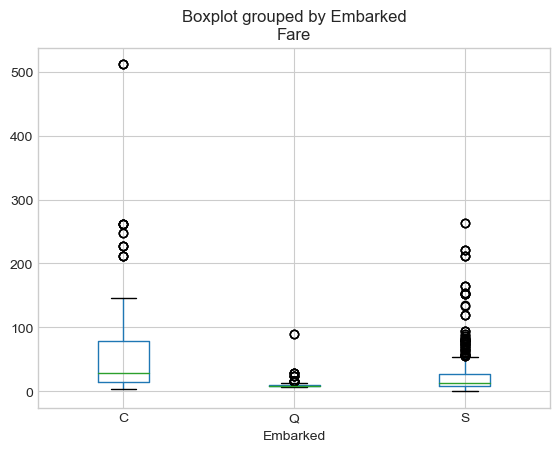

In [36]:
train_df.boxplot(column="Fare", by= "Embarked")
plt.show()

ortadaki yeşil çizgi medyan değerini tespit eder. Bu medyan değerlerine bakarsak Q limanını kullananların çok az para ödedikleri görülür bu yolcuların sahip oldukları kabinler ve Pclass değerleri çok düşük bu yolcular 3. sınıfta seyahat eden yolcular ve genellikle Q limanından binmişler

S'in medyan değerinin C'den düşük olduğu görülür. S limanından binen yolcular muhtemelen 2. sınıf yolculardır

Fare değeri 80 olanların C'den binmiş olma ihtimalleri fazladır.

In [37]:
# 2 yolcununda Fare değeri 80 olduğu için Embarked değerlerine C'yi atıyorum
train_df["Embarked"] = train_df["Embarked"].fillna("C")

In [38]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [39]:
# 1033 numaralı yolcunun Fare değerini yani ne kadar para ödediğini bilmiyoruz
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [40]:
# hangi limandan bindiğine veya sınıfına bakabiliriz
# bu seferde sınıfından yola çıkarak dolduralım

In [41]:
# sınıfı 3 olan yolcuların Fare değerlerinin ortalamasına bakalım
np.mean(train_df[ train_df["Pclass"] == 3 ]["Fare"])

12.741219971469329

In [42]:
# 3. sınıf yolcunun boş olan Fare değerini 
# sınıfı 3 olan yolcuların Fare değerlerinin ortalamasıyla dolduralım
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[ train_df["Pclass"]==3 ]["Fare"]))

In [43]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Korelasyon Matrisi

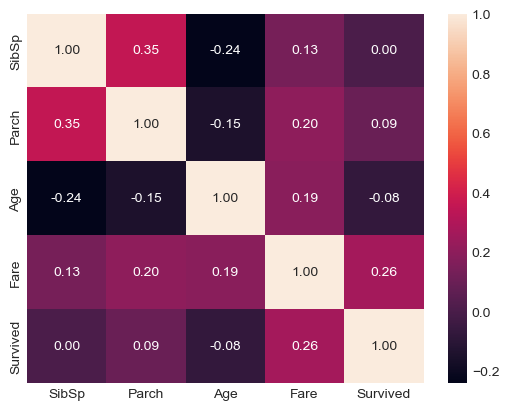

In [44]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt=".2f")
plt.show()

* Survived değişkeninin en çok Fare değişkeniyle alakalı olduğu görülür yani Fare ile yüksek bir korelasyona sahiptir, Fare ile Survived doğru orantılıdır. (0.26)
* bu gemiye binen yolcular bilet için çok fazla para ödediyse hayatta kalma şanslarının yüksek olduğu görülür.
* Fare dışındaki diğer değişkenlerin önemsiz olduğu anlamına gelmez buradaki feature'ları kullanarak ortaya çıkarılan yeni feature'lar Survived ile doğru orantılı olabilir.

## SibSp & Survived

SibSp ile Survived arasındaki ilişkiyi inceliyelim

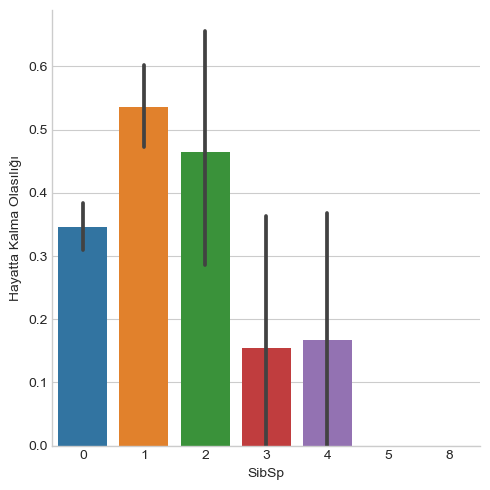

In [45]:
g = sns.catplot(x = "SibSp",
                   y = "Survived",
                   data = train_df,
                   kind = "bar",
                   height = 5)

g.set_ylabels("Hayatta Kalma Olasılığı") # Survived Probability
plt.show()

* yolcunun Survived değeri 1 ise hayatta kalıyor, 0 ise hayatını kaybediyor.
* SibSp ise yolcunun sahip olduğu kardeş ya da eş sayısıydı
* SibSp sayısı 2'den fazla ise hayatta kalma olasılığının azaldığı görülür.
* dolayısıyla yeni bir feature oluşturabiliriz örneğin SibSp2 adında yeni bir feature oluştururuz eşik değeri 2 olarak tanımlarız 2 ve daha az sayıda SibSp değerine sahip olanlar 1 olsun, 2'den fazla sayıda SibSp değerine sahip olanlar 2 olsun
* böylece yeni feature oluşturulur bu feature 2 tane kategoriye sahiptir bunu ml modelini eğitmek için kullanılabilir

## Parch & Survived

Parch ile Survived arasındaki ilişkiyi inceliyelim

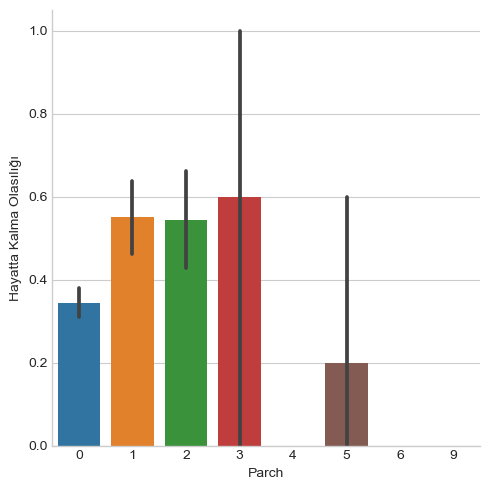

In [46]:
g = sns.catplot(x = "Parch",
                y = "Survived",
                kind = "bar",
                data= train_df,
                height=5)

g.set_ylabels("Hayatta Kalma Olasılığı") # Survived Probability
plt.show()

* Parch, bir yolcunun sahip olduğu ebeveyn veya çocuk sayısı yani Parch 3 ise yolcunun 3 tane ebeveyni ya da 3 tane çocuğu var demektir.
* yanlız gelen kişiler Parch değeri 1, 2 ve 3 olanlara göre daha az hayatta kalma olasılığına sahiptir.
* küçük ailelerin hayatta kalma olasılığı, büyük ailelere göre ve bireylere göre daha yüksektir.
* küçük aileleri kendi içerisinde değerlendirelim, Parch değeri 1 ve 2 olan yolcuların hayatta kalma olasılığı hemen hemen aynıdır. Parch değeri 3 olan sütunun siyah çizgisi standart sapmayı gösterir yani Parch değeri 3 olan yolcunun hayatta kalma olasılığı 0.6 ama bu bir ortalama değerdir bu değer 1'de olabilir 0.2'de olabilir bu iki aralıkta değişken bir değere sahiptir.
* Parch değeri 0 olan sütunun siyah çizgisine baktığımızda hayatta kalma olasılığının çok fazla değişmediği görülür.

* SipSp değeri 3 olduğunda standart sapmanın yüksek olduğu görülür
* eşik değeri 3 olarak belirleyebiliriz
* Parch ve SipSp'yi birleştirebiliriz ve daha sonra 2'ye ayrıp yeni bir feature elde edebiliriz

## Pclass & Survived

Pclass ile Survived arasındaki ilişkiyi inceliyelim

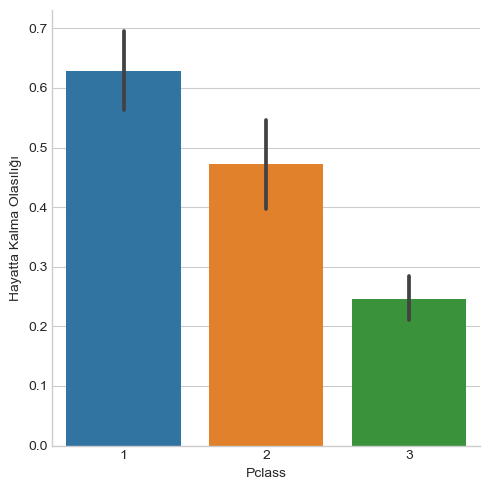

In [47]:
g = sns.catplot(x="Pclass",
                y="Survived",
                data = train_df,
                kind="bar",
               height=5)

g.set_ylabels("Hayatta Kalma Olasılığı") # Survived Probability
plt.show()

* en pahalı sınıf olan 1. sınıfta seyahat eden yolcuların hayatta kalma olasılığının diğer sınıflara göre çok yüksek olduğu görülür.

## Age & Survived

Age ile Survived arasındaki ilişkiyi inceliyelim

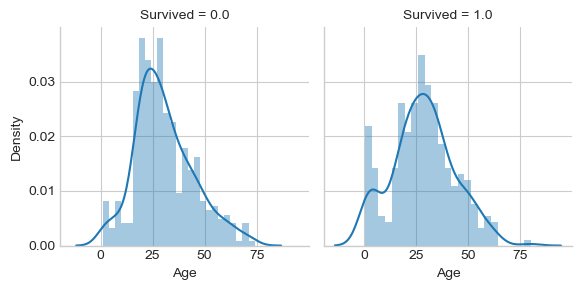

In [48]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

* 1. grafikte (Survived=0) hayatta kalamayanların yaş dağılımı verilmiştir.
* 2. grafikte (Survived=1) hayatta kalanların yaş dağılımı verilmiştir.
* Survived=1'de çocukların kurtulduğunu net bir şekilde görebiliriz. çocukların öncelikli olduğunu net bir şekilde görebiliriz
* Survived=2'de ise çocukların yaş dağılımında bir belirginlik söz konusu değil
* yaş özelliği doğası gereği normal dağılıma sahiptir. bu grafiklerde normal dağılıma benzerdir.
* Survived=1'de sağa doğru bir kuyruk vardır bu da yaşlıların kurtarılmasına özen gösterildiğini gösterir. oranın düşük olmasının nedeni yaşlı insanların az olmasıdır
* hayatta kalanların çoğu 30-35 yaş arasındadır
* hayatta kalamayanların çoğu 20, 35 yaş civarındadır.
* 15 ile 35 yaşları arasında çok fazla yolcu olduğu görülür

* Age <= 10 ise yaşama olasılığının yüksek olduğu görülür.
* yaşlı yolcular (80) hayatta kaldılar.
* 20 yaşındaki çok sayıda kişi hayatta kalamadı.
* 15 ile 35 yaşları arasında çok fazla yolcu olduğu görülür.
* Age değişkenini eğitim yaparken kullanabiliriz.
* buradaki dağılımları kullanarak Age özelliğinin missing yani kayıp değerlerini doldurabiliriz.

## Pclass & Survived & Age

Pclass, Age ve Survived arasındaki ilişkiyi inceliyelim

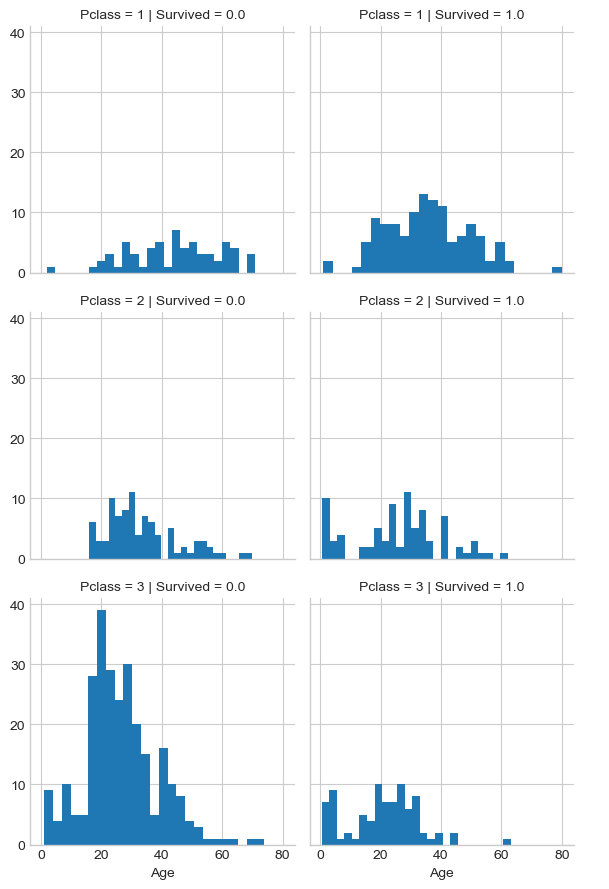

In [49]:
g = sns.FacetGrid(train_df,
                 col="Survived",
                 row="Pclass")
g.add_legend()
g.map(plt.hist, "Age", bins =25)
plt.show()

* satırlarda Pclass değeri değişir
* sütunlarda Survived değeri değişir
* yolcu sayısını bulmak için ölenler ve yaşayanları toplayabiliriz
* Pclass = 3 olan yolcuların sayısı diğer sınıflara göre daha fazla olduğu görülür.
* yolcu sayısının fazla olmasıyla yaşamaları arasında ters orantı olabilir
* Pclass = 3'te ölüm daha fazla
* Pclass = 2'de yaşama ve ölüm dengeli
* Pclass = 1'de yaşama oranı daha fazla

Pclass modeli eğitmede önemli bir özelliktir.

## Embarked & Sex & Pclass & Survived

Sex, Pclass, Embarked ve Survived arasındaki ilişkiyi inceliyelim

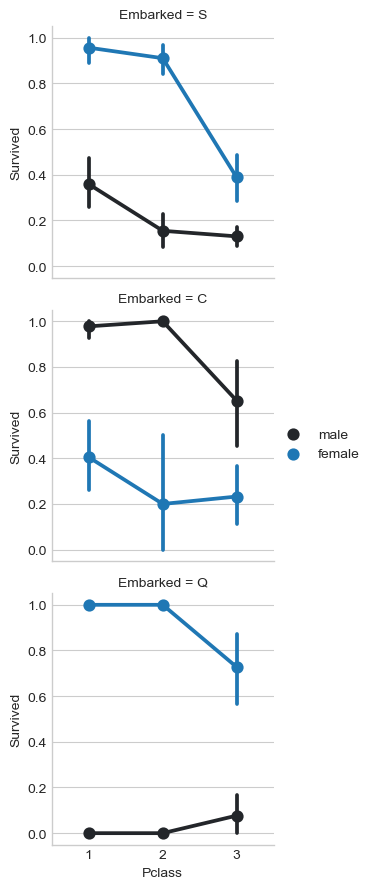

In [50]:
g = sns.FacetGrid(train_df, row="Embarked")
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

* S ve Q limanında kadınların hayatta kalma olasılığının daha yüksek olduğu görülür bu yüzden kadınların hayatta kalma olasılığının daha yüksek olduğunu söyleyebiliriz.
* kadınların hayatta kalma oranının erkeklerden daha fazla olduğu incelenmişti.
* cinsiyet ve hayatta kalma birbirleriyle alakalı özelliklerdir.
* Erkeklerin C limanında hayatta kalma olasılığının daha yüksek olduğu görülür.

kadın yolcuların hayatta kalma oranı erkeklerden çok daha fazla olduğu görülür. cinsiyet sınıflandırma yaparken önemli bir özelliktir. hayatta kalma oranını tahmin ederken cinsiyet özelliğini kullanacağız

* S limanı & Pclass grafiğine baktığımızda Pclass sırasıyla 1, 2 ve 3 olduğunda hem kadınlarda hemde erkeklerde hayatta kalma olasılığının azaldığı görülür.
* S ile Pclass arasında bir korelasyon vardır.

*korelasyon yoksa iki özellik farklı bilgiler taşır*

* C limanında Pclass 1'den 2'ye geçişte erkeklerin hayatta kalma olasılığının arttığı kadınların azaldığı 2'den 3'e geçişte ise kadınların hayatta kalma olasılığının arttığı erkeklerin azaldığı görülür.

Embarked ve cinsiyet eğitim için kullanılabilir

*Embarked değerleri farklı değişkenlerin değerlerine farklı tepkiler verdiğinden Embarked değişkeninden yeni bir özellik oluşturulması mantıksızdır.*

## Embarked & Sex & Fare & Survived

Sex, Fare, Embarked ve Survived arasındaki ilişkiyi inceliyelim

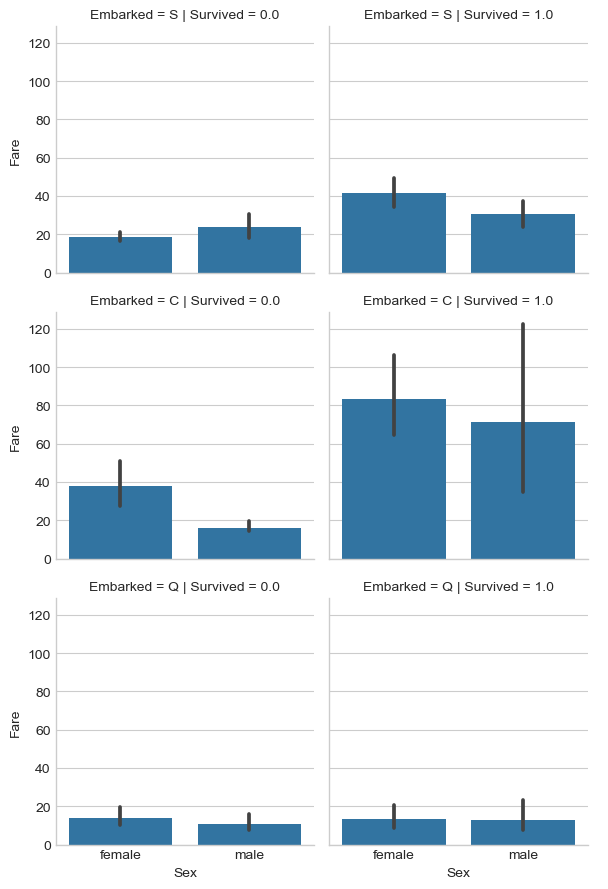

In [51]:
g = sns.FacetGrid(train_df, 
                 row = "Embarked",
                 col = "Survived")

g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

* 1. satırda S limanından binen insanlar için daha çok para ödeyenler daha az para ödeyenlere göre hayatta kalma olasılığı daha yüksektir.
* 2. satırda da daha fazla ödeyenler hayatta kalmışlar
* 3. satır Q limanında çok fazla bir fark gözükmüyor. 

* çok para ödendiğinde hayatta kalma olasılığı artıyor.

Fare ile ilgili eşik değer tanımlarsak Fare feature'ını kategorik bir özelliğe çevirebiliriz. örneğin 25'in altındakilere 1, 25 ve 50 arası 2, 50 ve 75 arası 3 deriz.

* S, Q ve C limanlarını karşılaştırdığımızda en yüksek hayatta kalma oranı C'ye aittir.
* Q limanı dışında hayatta kalan kadınlar, erkeklerden daha çok para ödemiştir

## Fill Missing: Age Value

In [52]:
train_df.isnull().sum()["Age"]

256

Age değişkeninde 256 tane kayıp değer vardır. Bunları dolduralım:

In [53]:
# Age değişkeninde kayıp değere sahip yolcuları göster
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


* Yaş değişkenindeki eksik veriler cinsiyete göre doldurulabilir. Erkek yolcuların yaşı, erkek yolcuların yaş ortalamasıyla; kadın yolcuların yaşı ise kadın yolcuların yaş ortalamasıyla doldurulabilir.
* Yaş değişkenindeki eksik veriler Pclass'a göre doldurulabilir. Sınıflara göre yolcular gruplanır, her bir grubun yaş ortalaması alınır. Yaş değeri olmayan yolculara bulunduğu grubun yaş ortalaması atanır.
* Yaş değişkenindeki eksik veriler Parch ve SibSp'ye göre doldurulabilir. Çocuğu olan birinin yaşı, çocuğu olmayan birine göre daha büyüktür.
* cinsiyete, Pclass'a, Parch ve SibSp değişkenlerinin hepsini kullanarak doldurulabilir.

#### Cinsiyet & Age

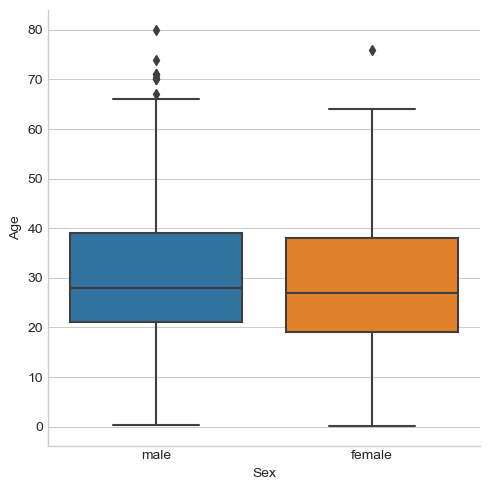

In [54]:
sns.catplot(x="Sex",
            y="Age",
           data = train_df,
           kind="box")
plt.show()

* Age dağılımlarına baktığımızda ortadaki çizgi medyanı ifade ediyor. medyan değerleri birbirine çok yakındır.
* Yaş tahmini yapılamaz çünkü erkek ve kadın için medyan değeri aynıdır yani yolcunun erkek veya kadın olmasının bir anlamı yokmuş gibi
* cinsiyet yaş tahmini için bilgilendirici değildir, yaş dağılımı aynı görünmektedir.
* aralarında bir fark yok. fark olsaydı kadın ve erkek olmasına göre yaşı tahmin edilebilirdi

In [55]:
## kesin ve net bir ayrım yapılamaz. sınıflandırılamaz?

#### Pclass & Age

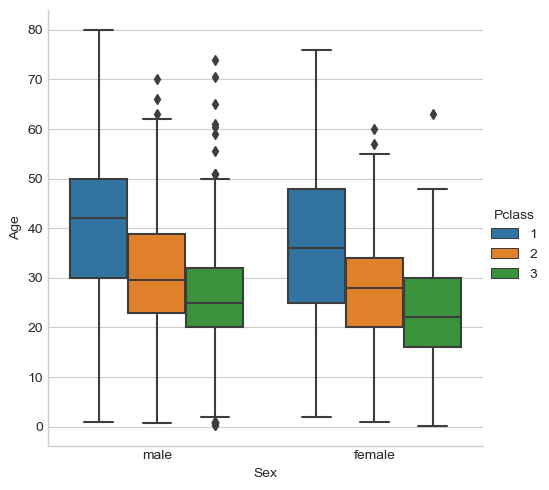

In [56]:
sns.catplot(x="Sex", y="Age", hue="Pclass", data=train_df, kind="box")
plt.show()

* Pclass=1 için Age medyan değerleri ortalaması 40
* Pclass=2 için Age medyan değerleri ortalaması 30
* Pclass=3 için Age medyan değerleri ortalaması 25
* yaş ortalaması: Pclass 1>2>3 olduğundan en yaşlı kesim 1. sınıfta, en genç kesim 3. sınıftadır.

#### Parch & Age

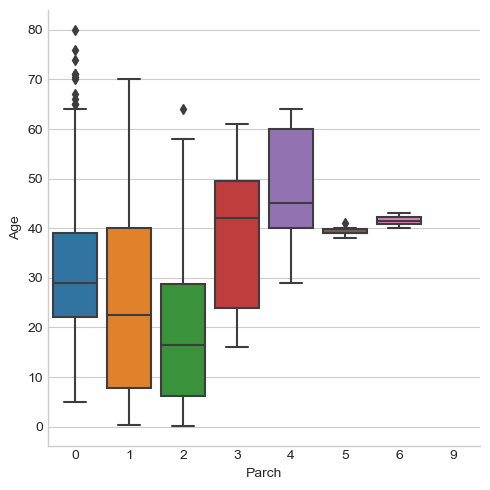

In [57]:
sns.catplot(x="Parch", y="Age", data = train_df, kind = "box")
plt.show()

* Parch değeri 0, 1, ve 2 olanların yaş medyan ortalaması 25 diyebiliriz
* Parch değeri 2'den fazla olanların yaş medyan ortalaması 45 diyebiliriz

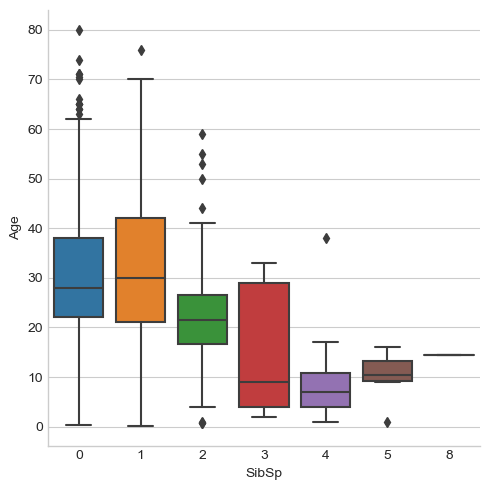

In [58]:
sns.catplot(x="SibSp", y="Age", data = train_df, kind = "box")
plt.show()

* SibSp değeri 0, 1, ve 2 olanların yaş medyan ortalaması 25 diyebiliriz
* SibSp değeri 2'den fazla olanların yaş medyan ortalaması 10 diyebiliriz

#### Bu değişkenler arasındaki korelasyonlara bakalım

In [59]:
train_df["Sex"][:3] ## Cinsiyet, string verilerden oluşur.

0      male
1    female
2    female
Name: Sex, dtype: object

In [60]:
# korelasyon matrisinde cinsiyet değişkeninin olması için 
# sayısal/nümerik bir değişkene çevirmeliyiz

In [61]:
# cinsiyet değişkenini sayısal/nümerik bir değişkene çevirelim:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]
train_df["Sex"][:3]

0    1
1    0
2    0
Name: Sex, dtype: int64

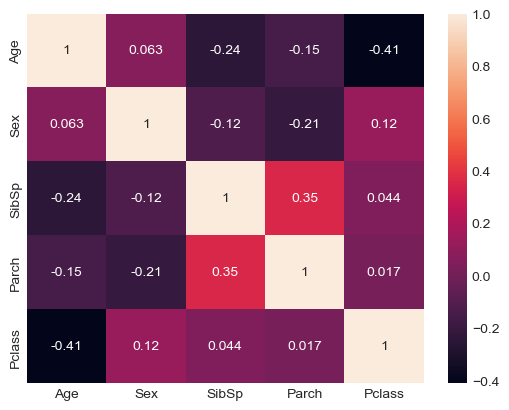

In [62]:
sns.heatmap(train_df[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot= True)
plt.show()

* yaş ve cinsiyet arasında herhangi bir ilişki yani korelasyon söz konusu değildir. (0.063)
* yaş ile diğer değişkenler arasında negatif bir korelasyon vardır.

In [63]:
# Age değişkenindeki boşlukları doldurmak için kod yazalım
# bu kayıp verilerin indekslerini bulalım
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
index_nan_age[:5]

[5, 17, 19, 26, 27]

In [64]:
for i in index_nan_age:
    age_pred = train_df["Age"][(
        (train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & 
        (train_df["Parch"] == train_df.iloc[i]["Parch"]) & 
        (train_df["Pclass"] == train_df.iloc[i]["Pclass"])
    )].median()
    
    age_med = train_df["Age"].median()
    
    # boş değilse
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [65]:
(train_df["SibSp"] == train_df.iloc[0]["SibSp"])

0        True
1        True
2       False
3        True
4       False
        ...  
1294    False
1295    False
1296    False
1297    False
1298     True
Name: SibSp, Length: 1299, dtype: bool

In [66]:
# Age değeri eksik olan verinin SibSp, Parch ve Pclass değerlerine bakılır
# bütün bu değerleriyle aynı anda aynı değerlere sahip yolcular bulunur
# bu yolcuların yaş değişkeninin medyanı alınır (age_pred)

In [67]:
# eğerki diğer yolcularında eksik değeri varsa bu durumda yine NaN sonuçlanır
# sonuç NaN ise Age değişkeninin medyan değeri kullanılır (age_med)

In [68]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


train_df içerisinde bulunan Age özelliğindeki tüm eksik veriler dolduruldu. doldurulurken Age, SibSp, Parch ve Pclass değişkenleri kullanıldı.

## Feature Engineering

Farklı feature'ları kullanarak hem feature'lar türetilecek hemde mevcut featureları farklı şekillerde yorumlayacağız 

### Name -> Title

In [69]:
# Name değişkeninde insanların isimleri ve ünvanları(title) var.
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

yolcuların isimleriyle ilgili bir hayatta kalma veya kalmama arasında bir bağlantı kuramayız. fakat insanların title'larına(Mr, Mrs) göre hayatta kalıp veya kalmama olasılıkları değişmiş olabilir.

In [70]:
train_df["Name"][0].split(".")[0]

'Braund, Mr'

In [71]:
train_df["Name"][0].split(".")[0].split(",")[-1]

' Mr'

In [72]:
train_df["Name"][0].split(".")[0].split(",")[-1].strip()

'Mr'

In [73]:
name = train_df["Name"]
train_df["Title"] = [ i.split(".")[0].split(",")[-1].strip() for i in name]

In [74]:
train_df["Title"][:5]

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

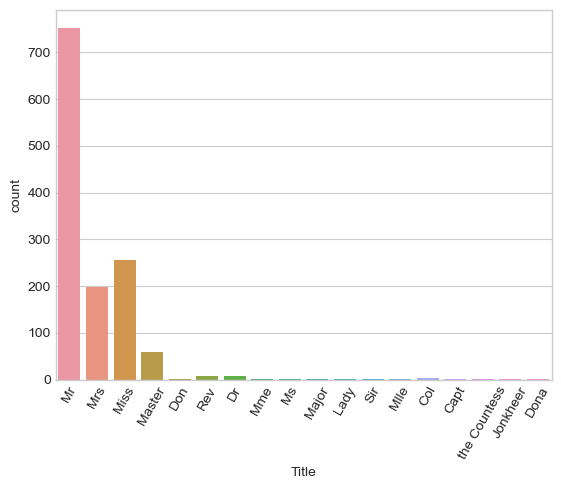

In [75]:
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation = 60)
plt.show()

* 700'den fazla Mr, 200 Mrs, 260 Miss ve 60 Master bulunur.
* 17 tane title var ve bu title'lar gruplanabilir
* Master'dan sonrası çok ender bulunan ünvanlardır
* bunları kategorik hale getirelim

In [76]:
# bütün ünvanlar 4 tane kategoriye dönüştürülecek
# çok ender bulunan ünvanlar ayrı kategorilendirildi ve other şeklinde adlandırıldı
train_df["Title"] = train_df["Title"].replace(["Lady", 
                                               "the Countess", 
                                               "Capt","Col","Don","Dr",
                                               "Major","Rev","Sir","Jonkheer",
                                               "Done"], "other")



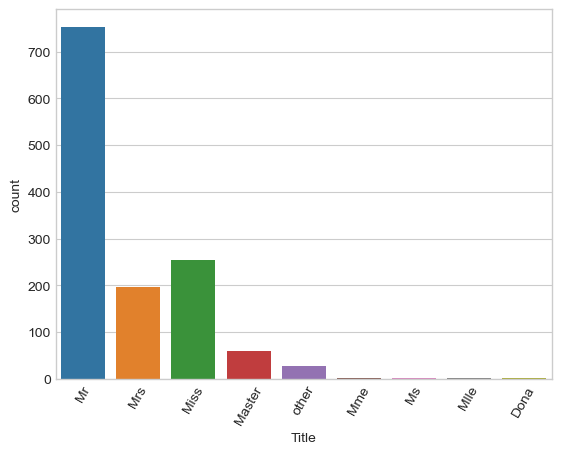

In [77]:
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation = 60)
plt.show()

In [78]:
# Master: 0
# Miss, Ms, Mlle, Mrs: 1
# Mr: 2
# geriye kalanlar (other, Mme, Dona): 3
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i=="Mr" else 3 for i in train_df["Title"]]

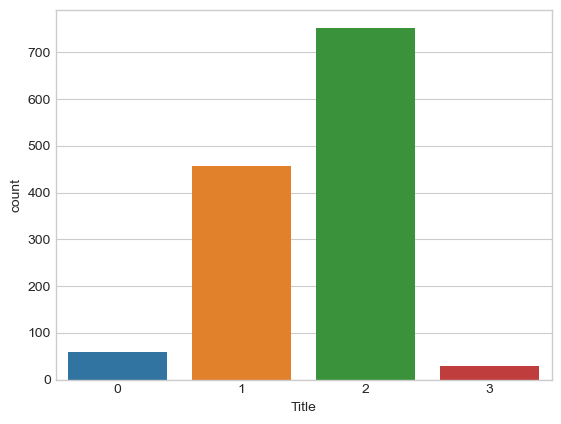

In [79]:
sns.countplot(x="Title", data=train_df)
plt.show()

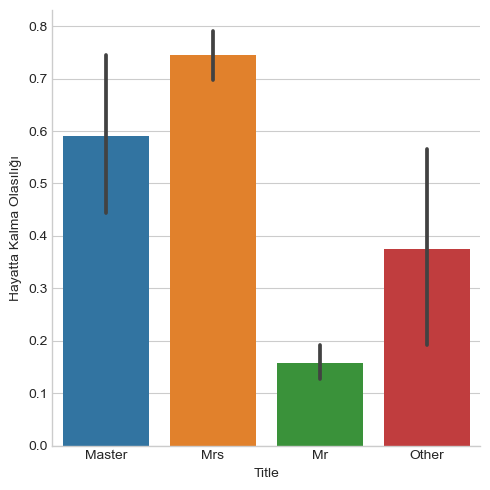

In [80]:
# hayatta kalma olasılıklarına bakalım
g = sns.catplot(x="Title", y="Survived", data=train_df, kind="bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Hayatta Kalma Olasılığı") # Survived Probability
plt.show()

* Hayatta kalma olasılığı en yüksek olan kadınlar, en düşük olan ise erkekler olmuştur.
* name değişkeni kullanılarak Title(ünvan) adlı yeni bir değişken oluşturuldu bu değişken 4 kategoriye ayrıldı. 

In [81]:
# name özelliğini kaldırabiliriz
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [82]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


In [83]:
# one-hot encoding
train_df = pd.get_dummies(train_df, columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


### Family Size

In [84]:
train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0


* SibSp ve Parch, insanların aileleriyle ilgili kişi sayılarını belirten özelliklerdir.
* SibSp, eş ya da kardeş sayısını ifade eder. Örneğin, değeri 1 ise ilgili kişinin 1 eşi ya da kardeşi olduğunu gösterir.
* Parch ise ebeveyn ya da çocuk sayısını temsil eder.

In [85]:
# SibSp ve Parch birleştireceğiz family size adında yeni bir feature oluşturacağız

In [86]:
# +1 yolcunun kendisidir
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [87]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


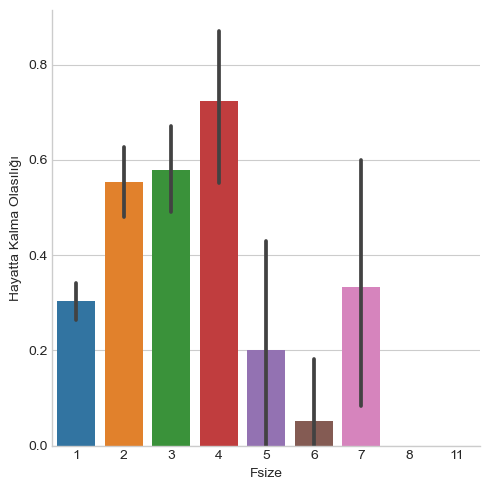

In [88]:
# Fsize & Survived
g = sns.catplot(x = "Fsize",
                y = "Survived",
                data = train_df,
                kind = "bar")

g.set_ylabels("Hayatta Kalma Olasılığı") # Survived Probability
plt.show()

* 4'den 5'e geçerken Hayatta kalma oranı düşüyor
* kategorilere ayırabiliriz
* eşik değer 5 seçilebilir. 5'ten küçükler farklı bir kategori, 4.5'dan büyükler farklı bir kategori olmak üzere toplamda 2 farklı kategori olur

In [89]:
train_df["family_size"] = [1 if i<5 else 0 for i in train_df["Fsize"]]

In [90]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,5,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0,3,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1


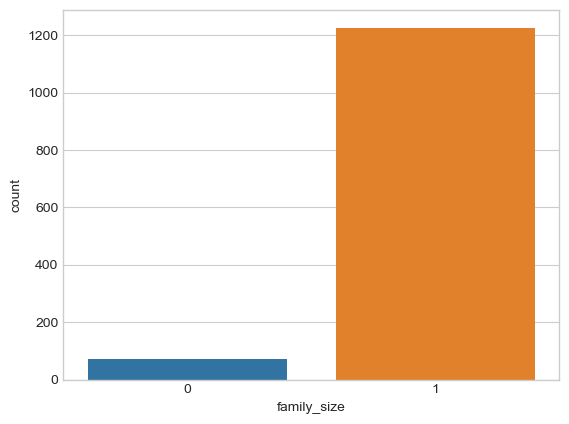

In [91]:
sns.countplot(x="family_size", data = train_df)
plt.show()

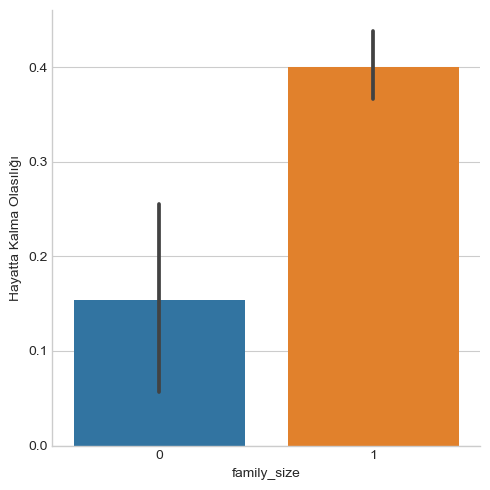

In [92]:
# family_size & Survived
g = sns.catplot(x = "family_size",
                y = "Survived",
                data = train_df,
                kind = "bar")

g.set_ylabels("Hayatta Kalma Olasılığı") # Survived Probability
plt.show()

* 0: aile boyutu 5 ve 5'ten büyük olanlar
* 1: aile boyutu 5'ten küçük olanlar
* görüldüğü üzere aile boyutu fazla olanların hayatta kalma olasılığı daha düşük, küçük ailelerin hayatta kalma olasılığı daha yüksek olduğu görülür.

In [93]:
# one-hot encoding
train_df = pd.get_dummies(train_df, columns=["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


### Feature Engineering: Embarked

In [94]:
train_df["Embarked"].head(2)

0    S
1    C
Name: Embarked, dtype: object

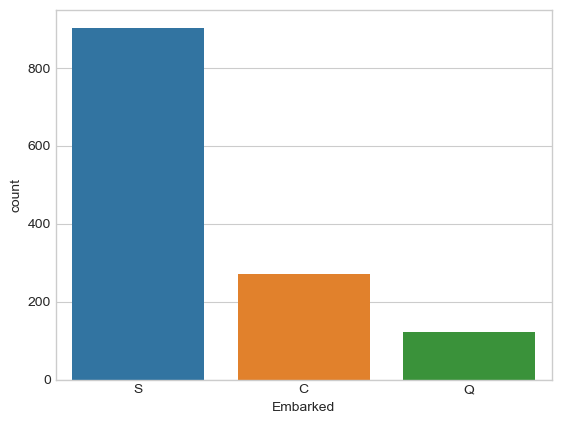

In [95]:
sns.countplot(x="Embarked", data=train_df)
plt.show()

In [96]:
# one-hot encoding
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df[:2]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0


### Feature Engineering: Ticket

In [97]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

Görüldüğü üzere biletlerdeki en baştaki değerler birden çok kişide varken en sondaki sayılar benzersizdir. bunlar boşluk ile ayrılmıştır. bazılarında baştaki değer yoktur o yüzden onlara x değerini atayacağız.

In [98]:
train_df["Ticket"][0].replace(".","").replace("/","").strip().split(" ")

['A5', '21171']

In [99]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")

In [100]:
train_df["Ticket"] = tickets

In [101]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [102]:
# Ticket'in içerisindeki sınıf sayısı kadar değişken oluşturulacak
# one-hot encoding
train_df = pd.get_dummies(train_df,
                          columns=["Ticket"],
                         prefix = "T")

In [103]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1


### Feature Engineering: Pclass

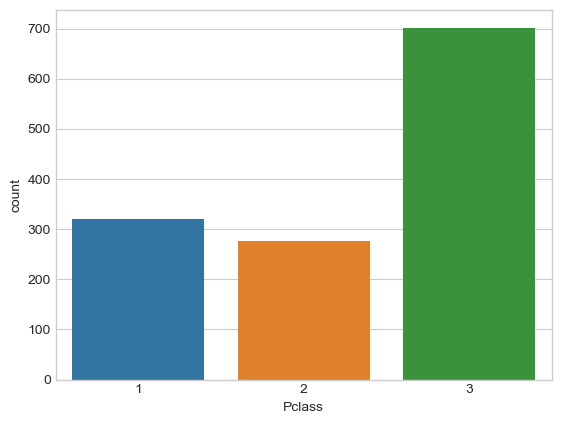

In [104]:
sns.countplot(x="Pclass", data = train_df)
plt.show()

In [105]:
# category veri tipine çevirelim
train_df["Pclass"] = train_df["Pclass"].astype("category")

In [106]:
# one-hot encoding
train_df = pd.get_dummies(train_df, columns=["Pclass"])

In [107]:
train_df.head(2)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0


### Feature Engineering: Sex

In [108]:
# category veri tipine çevirelim
train_df["Sex"] = train_df["Sex"].astype("category")

In [109]:
# one-hot encoding
train_df = pd.get_dummies(train_df, columns=["Sex"])

In [110]:
train_df.head(2)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0


### Feature Engineering: Drop Passenger ID and Cabin

Gereksiz değişkenleri siliyoruz.

In [111]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis=1, inplace=True)

In [112]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1'],
      dtype='object')

## Modelleme

In [113]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Modeling: Train Test Split

In [114]:
train_df.shape

(1299, 57)

In [115]:
# train veri setinin boyutu
train_df_len # birleştirmeden önceki uzunluğu

881

In [116]:
# test veri setimizi bulalım
test = train_df[train_df_len:]
test.drop(labels=["Survived"], axis=1, inplace=True)

In [117]:
test.head(3)

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [118]:
print("test:", test.shape) # sadece Survived değişkeni çıkarıldı

test: (418, 56)


In [119]:
train = train_df[:train_df_len]
X_train = train.drop(labels=["Survived"], axis=1)
y_train = train["Survived"]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                    y_train,
                                                    test_size=0.33,
                                                   random_state=42)


In [121]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
# satır sayısı, sütun sayısı

X_train: (590, 56)
X_test: (291, 56)
y_train: (590,)
y_test: (291,)


### Modeling: Simple Logistic Regression Model

In [122]:
# model oluşturuldu
logreg = LogisticRegression()

In [123]:
# model eğitildi
logreg.fit(X_train, y_train)

LogisticRegression()

In [124]:
# score ilk önce X değerleriyle tahmin eder
# bu tahmin sonuçlarıyla ve gerçek y değerleriyle
# accuarcy değerini hesaplar ve geri dönderir

In [125]:
acc_log_train = round(logreg.score(X_train, y_train)*100, 2)
print("Training Accuracy: %{}".format(acc_log_train))

Training Accuracy: %82.71


In [126]:
acc_log_test = round(logreg.score(X_test, y_test)*100, 2)
print("Testing Accuracy: %{}".format(acc_log_test))

Testing Accuracy: %81.79


### Modeling: Hyperparamater Tuning -- Grid Search -- Cross Validation

* 5 farklı ml modelini karşılaştıracağız
* Decision Tree, SVM, Random Forest, KNN ve Logistic Regression
* Bunları karşılaştırırken hiperparametre optimizasyonu yapacağız yani bu modellerin içerisinde bulunan parametrelerin en iyisini arayacağız
* en iyi parametreleri ararken Grid Search yöntemini kullanacağız ve bulduğumuz parameterlerin en iyi değerlerini karşılaştırırkende Cross Validation yöntemini kullanacağız.

In [127]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
              SVC(random_state = random_state),
              RandomForestClassifier(random_state = random_state),
              LogisticRegression(random_state = random_state),
              # KNeighborsClassifier()
             ]

In [128]:
dt_param_grid = {
    "min_samples_split": range(10, 500, 20), # 10'dan 500'e kadar 20'şer 20'şer
    "max_depth": range(1,20,2)
}

In [129]:
svc_param_grid = {
    "kernel": ["rbf"],
    "gamma": [0.001, 0.01, 0.1, 1],
    "C": [1,10,50,100,200,300,1000]
}

In [130]:
rf_param_grid = {
    "max_features": [1, 3, 10],
    "min_samples_split": [2,3,10],
    "min_samples_leaf":[1,3,10],
    "bootstrap":[False],
    "n_estimators": [100, 300],
    "criterion":["gini"]
}

In [131]:
logreg_param_grid = {
    "C":np.logspace(-3,3,7), # -3'den 3'e kadar 7 tane sayı
    "penalty": ["l1", "l2"]
}

In [132]:
knn_param_grid = {
    # 1'den 19'a kadar 10 tane sayı
    # linspace float değer üretir ama n_neighbors int değer alır
    # bu yüzden dtype=int
    "n_neighbors": np.linspace(1, 19, 10, dtype=int).tolist(),
    "weights": ["uniform","distance"],
    "metric": ["euclidean", "manhattan"]
}

In [133]:
classifier_params= [
    dt_param_grid,
    svc_param_grid,
    rf_param_grid,
    logreg_param_grid,
    # knn_param_grid,
]

* Hiperparametre, modellerin içerisinde kullanılan tune edilmesi gereken yani seçilmesi gereken parametrelerdir.
* Hiperparametre optimizasyonunda, farklı hiperparametre değerleri denendikten sonra, genellikle en yüksek doğruluk (accuracy) değerine sahip olan hiperparametre kombinasyonu en iyi parametre değerleri olarak kabul edilir.

In [134]:
cv_results = []
best_estimators = []

for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], 
                       param_grid = classifier_params[i],
                       cv = StratifiedKFold(n_splits=10),
                       scoring = "accuracy",
                       n_jobs=-1
                      )
    clf.fit(X_train, y_train)
    cv_results.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_results[i])

0.8355932203389831
0.7983050847457627
0.840677966101695


/Users/rumeysaay/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rumeysaay/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

0.8186440677966103
